# **IMPORT DATA**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

In [ ]:
import pandas as pd
data = pd.concat([X,y], axis=1)

# **EDA**

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
print(f'Dataset ini berisi {data.shape[0]} baris dan {data.shape[1]} kolom')

Dataset ini berisi 1728 baris dan 7 kolom


In [ ]:
#melihat unique value pada kolom dataset
for i in data.columns:
    print(f"{i}: {data[i].unique()}")

buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


In [ ]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# **PREPROCESSING DATA**

Mengubah data object menjadi suatu angka

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
le = LabelEncoder()

# Melakukan encoding pada setiap kolom dalam data
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# **SPLITTING DATA**

In [ ]:
# Memisahkan fitur dan label
X = data.drop(columns=['class'])
y = data['class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **TRAIN MODEL**

TRAIN XGB MODEL (Algoritma pohon keputusan yang ditingkatkan dengan teknik boosting)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definisikan kumpulan hyperparameter yang ingin dieksplorasi
param_grid_xgb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# Inisialisasi model XGBClassifier
xgb = XGBClassifier()

# Inisialisasi GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Lakukan pencarian grid pada data latih
grid_search_xgb.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Melatih model dengan hyperparameter terbaik
best_xgb = XGBClassifier(**best_params_xgb)
best_xgb.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_best_xgb = best_xgb.predict(X_test)

# Menghitung akurasi
acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Accuracy of Best XGBoost Classifier:", acc_best_xgb)

Best Hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Accuracy of Best XGBoost Classifier: 0.9855491329479769


In [ ]:
from sklearn.metrics import classification_report

# Hitung classification report untuk setiap model
report_xgb = classification_report(y_test, y_pred_best_xgb, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Classification Report for XGBoost:")
print(report_xgb)

Classification Report for XGBoost:
              precision    recall  f1-score   support

       unacc       0.99      0.95      0.97        83
         acc       0.73      1.00      0.85        11
        good       1.00      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.99       346
   macro avg       0.93      0.97      0.95       346
weighted avg       0.99      0.99      0.99       346



TRAIN DECISION TREE MODEL (Model yang memprediksi kelas dengan mengikuti serangkaian aturan yang dipelajari dari data)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definisikan kumpulan hyperparameter yang ingin dieksplorasi
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Inisialisasi GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Lakukan pencarian grid pada data latih
grid_search_dt.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Melatih model dengan hyperparameter terbaik
best_dt = DecisionTreeClassifier(**best_params_dt)
best_dt.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_best_dt = best_dt.predict(X_test)

# Menghitung akurasi
acc_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("Accuracy of Best Decision Tree Classifier:", acc_best_dt)

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Best Decision Tree Classifier: 0.9682080924855492


In [ ]:
# Hitung classification report untuk setiap model
report_dt = classification_report(y_test, y_pred_best_dt, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Classification Report for Decision Tree:")
print(report_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       unacc       0.97      0.92      0.94        83
         acc       0.56      0.91      0.69        11
        good       1.00      1.00      1.00       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346



 TRAIN CATBOOST MODEL (Algoritma pohon keputusan lain yang menggunakan boosting dan teknik "learning as you rank")

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [ ]:
# Definisikan kumpulan hyperparameter yang ingin dieksplorasi
from catboost import CatBoostClassifier

param_grid_catboost = {
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [6, 8, 10],
    'iterations': [100, 200, 300]
}

# Inisialisasi model CatBoostClassifier
catboost = CatBoostClassifier()

# Inisialisasi GridSearchCV
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=5, scoring='accuracy')

# Lakukan pencarian grid pada data latih
grid_search_catboost.fit(X_train, y_train, verbose=False)

# Dapatkan hyperparameter terbaik
best_params_catboost = grid_search_catboost.best_params_
print("Best Hyperparameters for CatBoost:", best_params_catboost)

# Melatih model dengan hyperparameter terbaik
best_catboost = CatBoostClassifier(**best_params_catboost)
best_catboost.fit(X_train, y_train, verbose=False)

# Melakukan prediksi pada data uji
y_pred_best_catboost = best_catboost.predict(X_test)

# Menghitung akurasi
acc_best_catboost = accuracy_score(y_test, y_pred_best_catboost)
print("Accuracy of Best CatBoost Classifier:", acc_best_catboost)

Best Hyperparameters for CatBoost: {'depth': 6, 'iterations': 300, 'learning_rate': 0.2}
Accuracy of Best CatBoost Classifier: 0.9884393063583815


In [ ]:
# Hitung classification report untuk setiap model
report_catboost = classification_report(y_test, y_pred_best_catboost, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Classification Report for CatBoost:")
print(report_catboost)

Classification Report for CatBoost:
              precision    recall  f1-score   support

       unacc       1.00      0.95      0.98        83
         acc       0.73      1.00      0.85        11
        good       1.00      1.00      1.00       235
       vgood       1.00      1.00      1.00        17

    accuracy                           0.99       346
   macro avg       0.93      0.99      0.96       346
weighted avg       0.99      0.99      0.99       346



TRAIN RANDOM FOREST MODEL (Ensemble model yang menggabungkan prediksi dari beberapa pohon keputusan acak)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definisikan kumpulan hyperparameter yang ingin dieksplorasi
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model RandomForestClassifier
rf = RandomForestClassifier()

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Lakukan pencarian grid pada data latih
grid_search_rf.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Melatih model dengan hyperparameter terbaik
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_best_rf = best_rf.predict(X_test)

# Menghitung akurasi
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Accuracy of Best Random Forest Classifier:", acc_best_rf)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy of Best Random Forest Classifier: 0.9653179190751445


In [ ]:
# Hitung classification report untuk setiap model
report_rf = classification_report(y_test, y_pred_best_rf, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Classification Report for Random Forest:")
print(report_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

       unacc       0.99      0.87      0.92        83
         acc       0.58      1.00      0.73        11
        good       0.99      1.00      0.99       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.89      0.95      0.90       346
weighted avg       0.97      0.97      0.97       346



TRAIN GRADIENT BOOST (Algoritma yang secara berulang menambahkan pohon keputusan ke model untuk meningkatkan akurasi)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Definisikan kumpulan hyperparameter yang ingin dieksplorasi
param_grid_gb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Inisialisasi model GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Inisialisasi GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Lakukan pencarian grid pada data latih
grid_search_gb.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

# Melatih model dengan hyperparameter terbaik
best_gb = GradientBoostingClassifier(**best_params_gb)
best_gb.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_best_gb = best_gb.predict(X_test)

# Menghitung akurasi
acc_best_gb = accuracy_score(y_test, y_pred_best_gb)
print("Accuracy of Best Gradient Boosting Classifier:", acc_best_gb)


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Accuracy of Best Gradient Boosting Classifier: 0.9971098265895953


In [ ]:
# Hitung classification report untuk setiap model
report_gb = classification_report(y_test, y_pred_best_gb, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Classification Report for Gradient Boosting:")
print(report_gb)

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

       unacc       1.00      0.99      0.99        83
         acc       0.92      1.00      0.96        11
        good       1.00      1.00      1.00       235
       vgood       1.00      1.00      1.00        17

    accuracy                           1.00       346
   macro avg       0.98      1.00      0.99       346
weighted avg       1.00      1.00      1.00       346



TRAIN KNN MODEL (Algoritma yang mengklasifikasikan data baru berdasarkan kelas dari data terdekat di ruang fitur)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Definisikan kumpulan hyperparameter yang ingin dieksplorasi
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Inisialisasi model KNeighborsClassifier
knn = KNeighborsClassifier()

# Inisialisasi GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Lakukan pencarian grid pada data latih
grid_search_knn.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for K-Nearest Neighbors:", best_params_knn)

# Melatih model dengan hyperparameter terbaik
best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_best_knn = best_knn.predict(X_test)

# Menghitung akurasi
acc_best_knn = accuracy_score(y_test, y_pred_best_knn)
print("Accuracy of Best K-Nearest Neighbors Classifier:", acc_best_knn)


Best Hyperparameters for K-Nearest Neighbors: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy of Best K-Nearest Neighbors Classifier: 0.8786127167630058


In [ ]:
# Hitung classification report untuk setiap model
report_knn = classification_report(y_test, y_pred_best_knn, target_names=['unacc', 'acc', 'good', 'vgood'])
print("Classification Report for K-Nearest Neighbors:")
print(report_knn)

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

       unacc       0.80      0.69      0.74        83
         acc       0.43      0.27      0.33        11
        good       0.91      1.00      0.95       235
       vgood       0.91      0.59      0.71        17

    accuracy                           0.88       346
   macro avg       0.76      0.64      0.68       346
weighted avg       0.87      0.88      0.87       346



VISUALISASI AKURASI DARI MASING-MASING MODEL

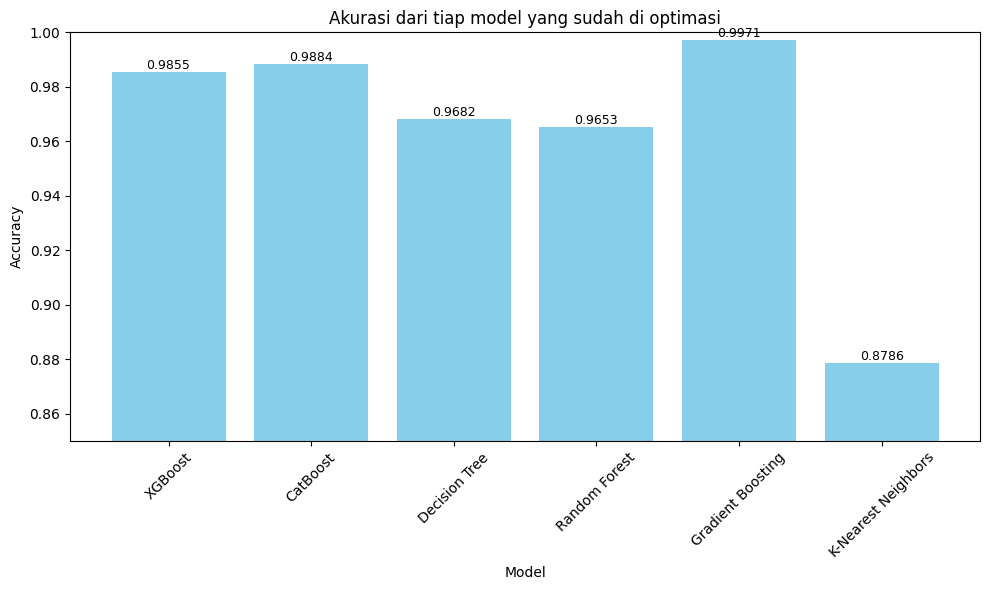


Model terbaik berdasarkan akurasi: Gradient Boosting dengan skor 0.9971098265895953


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Daftar model dan akurasi
models = ['XGBoost', 'CatBoost', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors']
accuracies = [acc_best_xgb, acc_best_catboost, acc_best_dt, acc_best_rf, acc_best_gb, acc_best_knn]


# Plot bar untuk akurasi model
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')

# Annotate each bar with its value
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{acc:.4f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Akurasi dari tiap model yang sudah di optimasi')
plt.ylim(0.85, 1.0)  # Set batas sumbu y untuk memperjelas perbedaan
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pemilihan model terbaik berdasarkan akurasi
best_accuracy = max(accuracies)
best_model_index = accuracies.index(best_accuracy)
best_model = models[best_model_index]

print(f"\nModel terbaik berdasarkan akurasi: {best_model} dengan skor {best_accuracy}")


TESTING BEST MODEL DAN MEMASUKKANNYA KE DALAM FILE CSV

In [ ]:
# Mendekode variabel target yang telah diencode sebelumnya
decoded_y_test = le.inverse_transform(y_test)
decoded_y_pred_gb = le.inverse_transform(y_pred_best_gb)

# Buat DataFrame yang berisi index dan hasil prediksi
prediction_result_df = pd.DataFrame({'Index': range(len(decoded_y_test)), 'True_Label': decoded_y_test, 'Predicted_Label': decoded_y_pred_gb})

# Simpan DataFrame ke dalam file CSV
prediction_result_df.to_csv('prediction_result.csv', index=False)